# Import Libraries and Datas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('hotel_bookings.csv')

In [3]:
train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Data Analysis

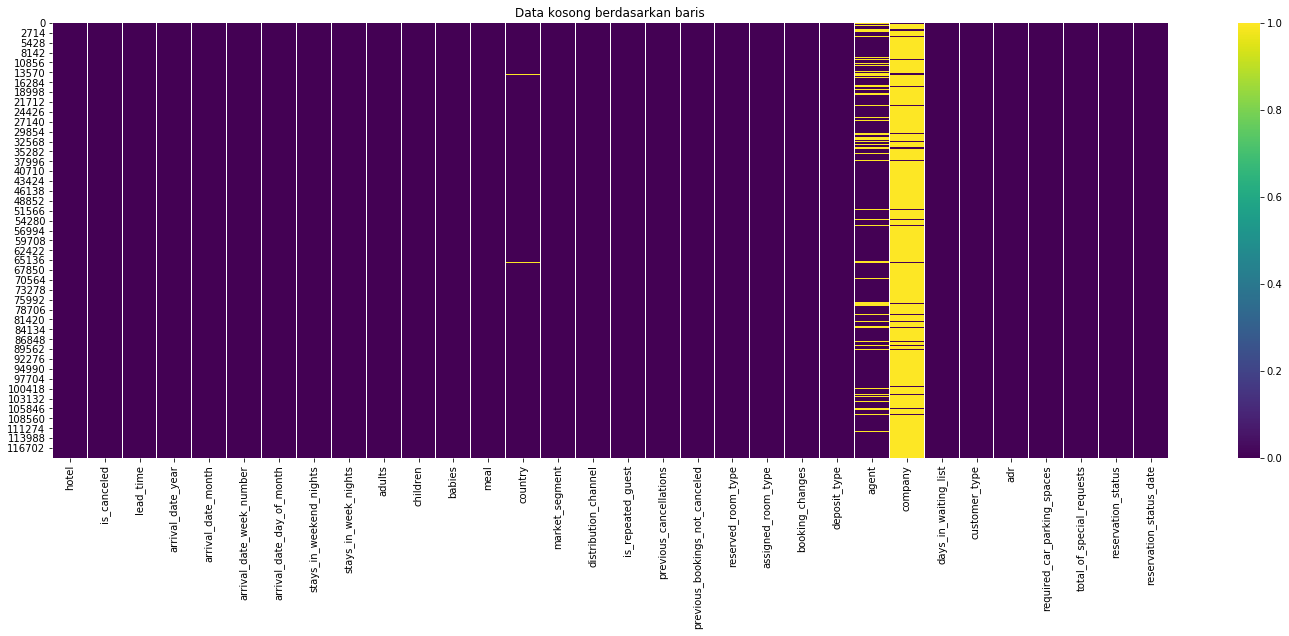

In [5]:
plt.figure(figsize=(25,8))
plt.title('Data kosong berdasarkan baris')
sns.heatmap(data=train.isnull(),cmap='viridis')

In [154]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
hotel                             119390 non-null object
is_canceled                       119390 non-null int64
lead_time                         119390 non-null int64
arrival_date_year                 119390 non-null int64
arrival_date_month                119390 non-null object
arrival_date_week_number          119390 non-null int64
arrival_date_day_of_month         119390 non-null int64
stays_in_weekend_nights           119390 non-null int64
stays_in_week_nights              119390 non-null int64
adults                            119390 non-null int64
children                          119386 non-null float64
babies                            119390 non-null int64
meal                              119390 non-null object
country                           118902 non-null object
market_segment                    119390 non-null object
distribution_channel              119390 n

## 1. Banyak reservasi hotel

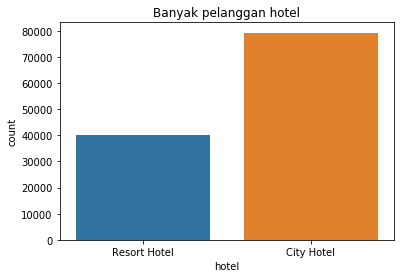

In [6]:
plt.title('Banyak pelanggan hotel')
sns.countplot(x='hotel',data=train)

In [7]:
print('Banyak reservasi hotel:')
train['hotel'].value_counts()

Banyak reservasi hotel:


City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

### Perbandingan tamu cancel/tidak berdasarkan hotel

In [8]:
data_analisis = train.copy()

In [9]:
def impute_canceled(cols):
    is_canceled = cols[0]
    hotel = cols[1]
    
    if is_canceled==0:
        return 'Tamu Hotel'
    else:
        return 'Reservasi Batal'
data_analisis['Reservasi']=data_analisis[['is_canceled','hotel']].apply(impute_canceled,axis=1)

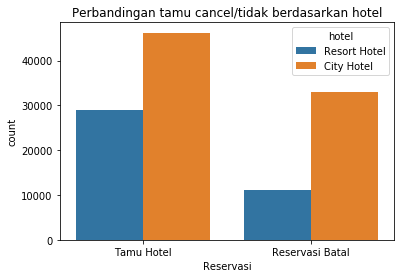

In [11]:
plt.title('Perbandingan tamu cancel/tidak berdasarkan hotel')
sns.countplot(x='Reservasi', hue='hotel', data=data_analisis)

In [13]:
print('Banyak tamu hotel')
train[train['is_canceled']==0]['hotel'].value_counts()

Banyak tamu hotel


City Hotel      46228
Resort Hotel    28938
Name: hotel, dtype: int64

In [14]:
print('Banyak pembatalan reservasi')
train[train['is_canceled']==1]['hotel'].value_counts()

Banyak pembatalan reservasi


City Hotel      33102
Resort Hotel    11122
Name: hotel, dtype: int64

In [15]:
print('Sebanyak {:.2f}% reservasi untuk City Hotel dibatalkan, lebih tinggi daripada Resort Hotel ({:.2f}%)'.format(
    (train[(train['hotel']=='City Hotel') & (train['is_canceled']==1)]['is_canceled'].count()*100/train[train['hotel']=='City Hotel']['is_canceled'].count()), 
    (train[(train['hotel']=='Resort Hotel') & (train['is_canceled']==1)]['is_canceled'].count())*100/train[train['hotel']=='Resort Hotel']['is_canceled'].count()))

Sebanyak 41.73% reservasi untuk City Hotel dibatalkan, lebih tinggi daripada Resort Hotel (27.76%)


## 2. Lead Time

### Sebaran lead time berdasarkan pembatalan

(0, 100)

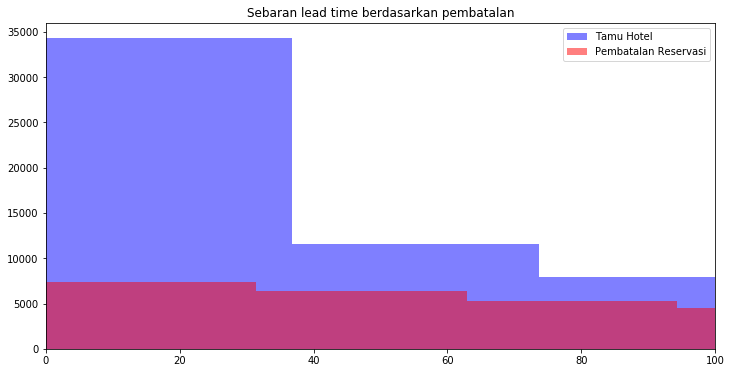

In [16]:
plt.figure(figsize=(12,6))
plt.title('Sebaran lead time berdasarkan pembatalan')
train[(train['is_canceled']==0)]['lead_time'].hist(alpha=0.5,bins=20,color='blue',grid=False)
train[(train['is_canceled']==1)]['lead_time'].hist(alpha=0.5,bins=20,color='red',grid=False)
plt.legend(loc='upper right',labels=['Tamu Hotel','Pembatalan Reservasi'])
plt.xlim(0,100)

### Sebaran lead time yang melakukan pembatalan reservasi berdasarkan hotel

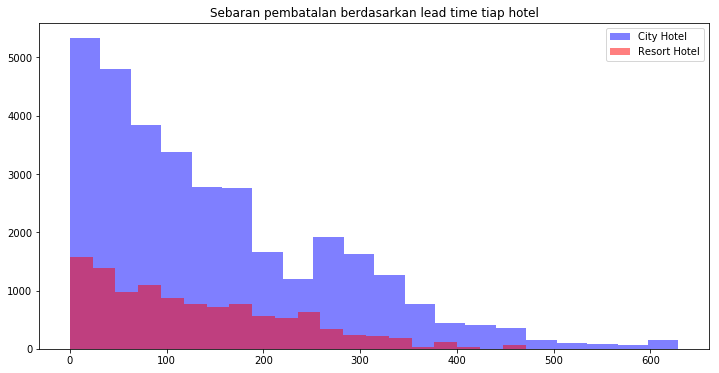

In [230]:
plt.figure(figsize=(12,6))
plt.title('Sebaran pembatalan berdasarkan lead time tiap hotel')
train[(train['is_canceled']==1) & (train['hotel']=='City Hotel')]['lead_time'].hist(alpha=0.5,bins=20,color='blue',grid=False)
train[(train['is_canceled']==1) & (train['hotel']=='Resort Hotel')]['lead_time'].hist(alpha=0.5,bins=20,color='red',grid=False)
plt.legend(loc='upper right',labels=['City Hotel','Resort Hotel'])

## 4. Arrival date year

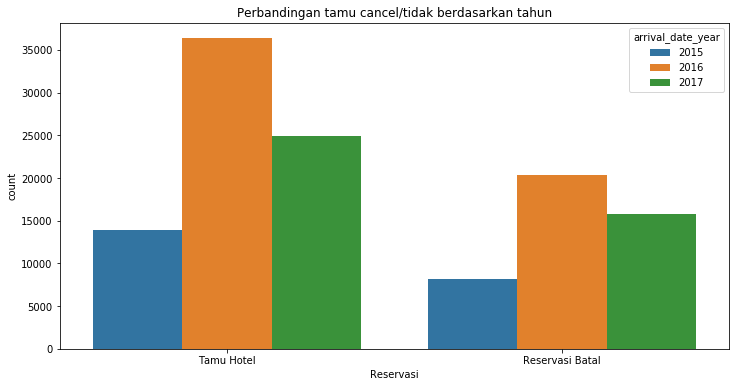

In [204]:
plt.figure(figsize=(12,6))
plt.title('Perbandingan tamu cancel/tidak berdasarkan tahun')
sns.countplot(x='Reservasi', hue='arrival_date_year', data=train)

In [205]:
print('Banyak reservasi hotel berdasarkan tahun')
train['arrival_date_year'].value_counts()

Banyak reservasi hotel berdasarkan tahun


2016    56707
2017    40687
2015    21996
Name: arrival_date_year, dtype: int64

In [206]:
print('Banyak tamu hotel berdasarkan tahun')
train[train['is_canceled']==0]['arrival_date_year'].value_counts()

Banyak tamu hotel berdasarkan tahun


2016    36370
2017    24942
2015    13854
Name: arrival_date_year, dtype: int64

In [207]:
print('Banyak pembatalan reservasi berdasarkan tahun')
train[train['is_canceled']==1]['arrival_date_year'].value_counts()

Banyak pembatalan reservasi berdasarkan tahun


2016    20337
2017    15745
2015     8142
Name: arrival_date_year, dtype: int64

In [213]:
print('Sebanyak {:.2f}% reservasi tahun 2015 dibatalkan, {:.2f}% pada tahun 2016, dan {:.2f}% pada tahun 2017. Karena perbedaan tidak cukup signifikan, tahun tidak mempengaruhi pembatalan reservasi'.format(
    (train[(train['arrival_date_year']==2015) & (train['is_canceled']==1)]['is_canceled'].count()*100/train[train['arrival_date_year']==2015]['is_canceled'].count()), 
    (train[(train['arrival_date_year']==2016) & (train['is_canceled']==1)]['is_canceled'].count())*100/train[train['arrival_date_year']==2016]['is_canceled'].count(),
     (train[(train['arrival_date_year']==2017) & (train['is_canceled']==1)]['is_canceled'].count())*100/train[train['arrival_date_year']==2017]['is_canceled'].count()))

Sebanyak 37.02% reservasi tahun 2015 dibatalkan, 35.86% pada tahun 2016, dan 38.70% pada tahun 2017. Karena perbedaan tidak cukup signifikan, tahun tidak mempengaruhi pembatalan reservasi


## 5. Arrival_date_month (Auto Drop)

## 6. Arrival_date_week_number

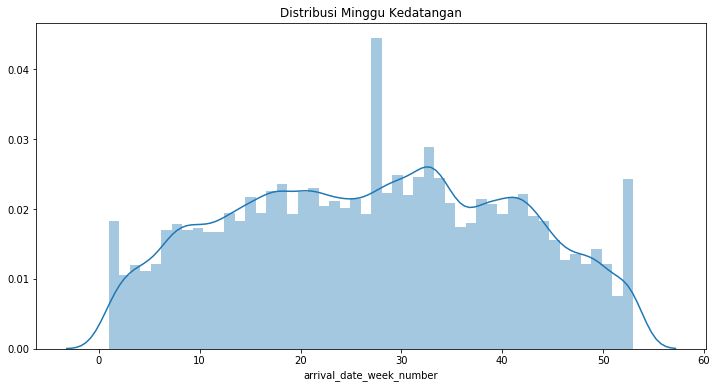

In [241]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Minggu Kedatangan')
sns.distplot(train['arrival_date_week_number'],bins=50)

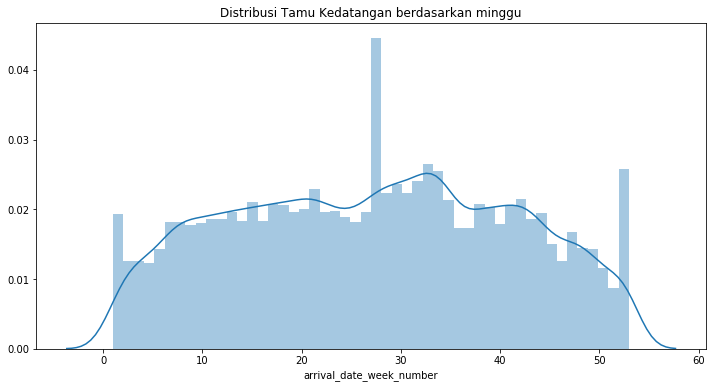

In [242]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Tamu Kedatangan berdasarkan minggu')
sns.distplot(train[train['is_canceled']==0]['arrival_date_week_number'],bins=50)

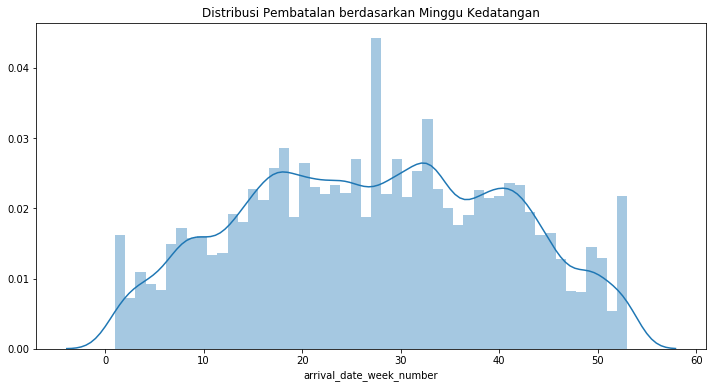

In [243]:
plt.figure(figsize=(12,6))
plt.title('Distribusi Pembatalan berdasarkan Minggu Kedatangan')
sns.distplot(train[train['is_canceled']==1]['arrival_date_week_number'],bins=50)